<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Event-Analysis-and-A/A/B-Testing." data-toc-modified-id="Event-Analysis-and-A/A/B-Testing.-1">Event Analysis and A/A/B Testing.</a></span><ul class="toc-item"><li><span><a href="#1.-Data-overview." data-toc-modified-id="1.-Data-overview.-1.1">1. Data overview.</a></span></li><li><span><a href="#2.-Data-preprocessing." data-toc-modified-id="2.-Data-preprocessing.-1.2">2. Data preprocessing.</a></span><ul class="toc-item"><li><span><a href="#2.1.-Improving-style-and-readability,-removing-duplicates" data-toc-modified-id="2.1.-Improving-style-and-readability,-removing-duplicates-1.2.1">2.1. Improving style and readability, removing duplicates</a></span></li><li><span><a href="#2.2.-Changing-data-types,-adding-columns" data-toc-modified-id="2.2.-Changing-data-types,-adding-columns-1.2.2">2.2. Changing data types, adding columns</a></span></li></ul></li><li><span><a href="#3.-Data-examination-and-validation." data-toc-modified-id="3.-Data-examination-and-validation.-1.3">3. Data examination and validation.</a></span></li><li><span><a href="#4.-Sales-funnel-analysis." data-toc-modified-id="4.-Sales-funnel-analysis.-1.4">4. Sales funnel analysis.</a></span></li><li><span><a href="#5.-Experiment-result-analysis." data-toc-modified-id="5.-Experiment-result-analysis.-1.5">5. Experiment result analysis.</a></span><ul class="toc-item"><li><span><a href="#5.1.-A1/A2-experiment" data-toc-modified-id="5.1.-A1/A2-experiment-1.5.1">5.1. A1/A2-experiment</a></span></li><li><span><a href="#5.2.-A1/B-experiment" data-toc-modified-id="5.2.-A1/B-experiment-1.5.2">5.2. A1/B-experiment</a></span></li><li><span><a href="#5.3.-A2/B-experiment" data-toc-modified-id="5.3.-A2/B-experiment-1.5.3">5.3. A2/B-experiment</a></span></li><li><span><a href="#5.4.-A1+A2/B-experiment" data-toc-modified-id="5.4.-A1+A2/B-experiment-1.5.4">5.4. A1+A2/B-experiment</a></span></li></ul></li><li><span><a href="#6.-Statistical-significance-level." data-toc-modified-id="6.-Statistical-significance-level.-1.6">6. Statistical significance level.</a></span><ul class="toc-item"><li><span><a href="#6.1.-Increasing-the-level-of-statistical-significance-to-0.1" data-toc-modified-id="6.1.-Increasing-the-level-of-statistical-significance-to-0.1-1.6.1">6.1. Increasing the level of statistical significance to 0.1</a></span><ul class="toc-item"><li><span><a href="#А1/А2-experiment" data-toc-modified-id="А1/А2-experiment-1.6.1.1">А1/А2-experiment</a></span></li><li><span><a href="#А1/B-experiment" data-toc-modified-id="А1/B-experiment-1.6.1.2">А1/B-experiment</a></span></li><li><span><a href="#А2/В-experiment" data-toc-modified-id="А2/В-experiment-1.6.1.3">А2/В-experiment</a></span></li><li><span><a href="#А1+А2/В-experiment" data-toc-modified-id="А1+А2/В-experiment-1.6.1.4">А1+А2/В-experiment</a></span></li></ul></li><li><span><a href="#6.2.-Decrease-in-the-level-of-statistical-significance.-Bonferroni-correction." data-toc-modified-id="6.2.-Decrease-in-the-level-of-statistical-significance.-Bonferroni-correction.-1.6.2">6.2. Decrease in the level of statistical significance. Bonferroni correction.</a></span><ul class="toc-item"><li><span><a href="#А1/А2-experiment" data-toc-modified-id="А1/А2-experiment-1.6.2.1">А1/А2-experiment</a></span></li><li><span><a href="#А1/B-experiment" data-toc-modified-id="А1/B-experiment-1.6.2.2">А1/B-experiment</a></span></li><li><span><a href="#А2/В-experiment" data-toc-modified-id="А2/В-experiment-1.6.2.3">А2/В-experiment</a></span></li><li><span><a href="#А1+А2/В-experiment" data-toc-modified-id="А1+А2/В-experiment-1.6.2.4">А1+А2/В-experiment</a></span></li></ul></li></ul></li><li><span><a href="#7.-Conclusions." data-toc-modified-id="7.-Conclusions.-1.7">7. Conclusions.</a></span></li></ul></li></ul></div>

# Event Analysis and A/A/B Testing.

 **Project Description**

A study of user behavior in a mobile application for a food product startup.

**Data Description**

File:
- _`logs_exp.csv`_ — contains records, each representing a user action or event.

Structure of _logs_exp.csv_:
- _`EventName`_ — the name of the event;
- _`DeviceIDHash`_ — the unique user identifier;
- _`EventTimestamp`_ — the time of the event;
- _`ExpId`_ — the experiment number: 246 and 247 are control groups, while 248 is the experimental group.

**Objectives:**

1. Analyze the sales funnel and understand how users progress toward making a purchase. Identify how many users fail to complete a purchase and at which steps they drop off.
2. Investigate the results of the A/A/B experiment to determine the impact of new fonts on user behavior. Determine whether the new font has advantages over the old one in terms of positively influencing user behavior.

**Research Plan:**
 1. Data overview.
 2. Data preprocessing.
 3. Data examination and validation.
 4. Sales funnel analysis.
 5. Experiment result analysis.
 6. Statistical significance level.
 7. Conclusions.

## 1. Data overview.

In [51]:
# All the necessary libraries are imported in this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth

In [52]:
try:
    df = pd.read_csv('/datasets/logs_exp.csv', sep='\t')
except:
    df = pd.read_csv('https://.../datasets/logs_exp.csv', sep='\t')

In [53]:
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [54]:
# Let's check for missing values
df.isnull().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

There are no missing values.

In [55]:
# Let's get acquainted with the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


According to the description "EventTimestamp" is the time of the event. We will bring the data of this column to the value "datetime" in the next step of Preprocessing.

In [56]:
# let's check for obvious duplicates and, if there are any, determine their percentage in %% of the total number of rows
print(df.duplicated().sum(), '- total duplicates')
print(round(df.duplicated().sum() / df['DeviceIDHash'].count() * 100, 2), '- percentage of duplicates in the total number of rows')

413 - total duplicates
0.17 - percentage of duplicates in the total number of rows


There are duplicates, their number is minor and amounts to 0.17%. Let's get rid of obvious duplicates in the next step of Preprocessing.

In [57]:
# we will check for non-obvious duplicates
df['EventName'].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

There are no obvious duplicates.

## 2. Data preprocessing.

### 2.1. Improving style and readability, removing duplicates

In [58]:
# Let's change the name of the columns, reduce them to lowercase and remove unnecessary spaces if any
df.columns

Index(['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId'], dtype='object')

In [59]:
df.columns = df.columns.str.lower()
df = df.rename(columns={
    'eventname': 'event_name',
    'deviceidhash': 'device_id',
    'eventtimestamp': 'event_timestamp',
    'expid': 'test_id',
})

In [60]:
# Let's check the result
df.columns

Index(['event_name', 'device_id', 'event_timestamp', 'test_id'], dtype='object')

In [61]:
# Let's remove the obvious duplicates
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

### 2.2. Changing data types, adding columns

In [62]:
# Convert event_timestamp to a date and time column, and add a separate date column
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='s')
df['date'] = df['event_timestamp'].astype('datetime64[D]')
df.head()

,event_name,device_id,event_timestamp,test_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


In [63]:
# Let's check if the same users didn't get into different testing groups
df.groupby('device_id').agg({'test_id': 'nunique'}).reset_index().query('test_id > 1').count()

device_id    0
test_id      0
dtype: int64

There are no intersections by users in different groups.

## 3. Data examination and validation.

In [64]:
# Let's find out how many events are in the log, how many users there are and how many events per user on average
print('Total events in the log:', df['event_name'].count())
print('Total users in the log:', df['device_id'].nunique())
print('Average number of events per user:', round(df['event_name'].count() / df['device_id'].nunique()))

Total events in the log: 243713
Total users in the log: 7551
Average number of events per user: 32


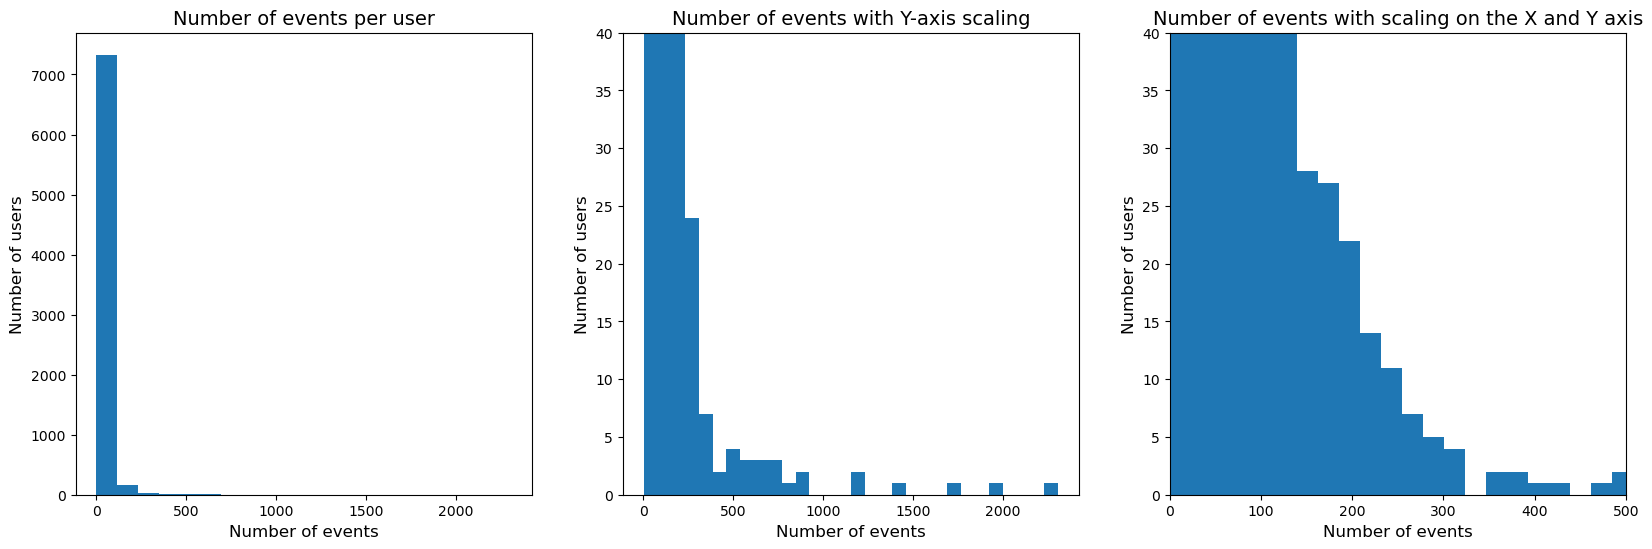

In [65]:
# Let's find out the distribution of the number of events by users by building a histogram
plt.figure(figsize=(20, 6))
events = df.groupby('device_id')['event_name'].count().sort_values()
ax = plt.subplot(1, 3, 1)
plt.hist(events, bins=20)
plt.title('Number of events per user', fontsize=14)
plt.ylabel('Number of users', fontsize=12)
plt.xlabel('Number of events', fontsize=12)
ax = plt.subplot(1, 3, 2)
plt.hist(events, bins=30)
plt.title('Number of events with Y-axis scaling', fontsize=14)
plt.ylabel('Number of users', fontsize=12)
plt.xlabel('Number of events', fontsize=12)
plt.ylim(0, 40)
ax = plt.subplot(1, 3, 3)
plt.hist(events, bins=100)
plt.title('Number of events with scaling on the X and Y axis', fontsize=14)
plt.ylabel('Number of users', fontsize=12)
plt.xlabel('Number of events', fontsize=12)
plt.ylim(0, 40)
plt.xlim(0, 500)
plt.show()

Most users commit from 1 to 200 events. However, single users account for up to about 2,300 events.

Taking into account the single extreme values, it is not entirely correct to use the average to estimate the number of events per user. The calculation of the median value is more applicable here.

In [66]:
# Calculate the median
a = pd.DataFrame(events).reset_index()
a['event_name'].median()

20.0

Median value: 20 events per user.

In [67]:
# Find the maximum and minimum date
print('Minimum date and time:', df['event_timestamp'].min())
print('Maximum date and time:', df['event_timestamp'].max())

Minimum date and time: 2019-07-25 04:43:36
Maximum date and time: 2019-08-07 21:15:17


We have data for the period from 04:43 on July 25 to 21:15 on August 07, 2019

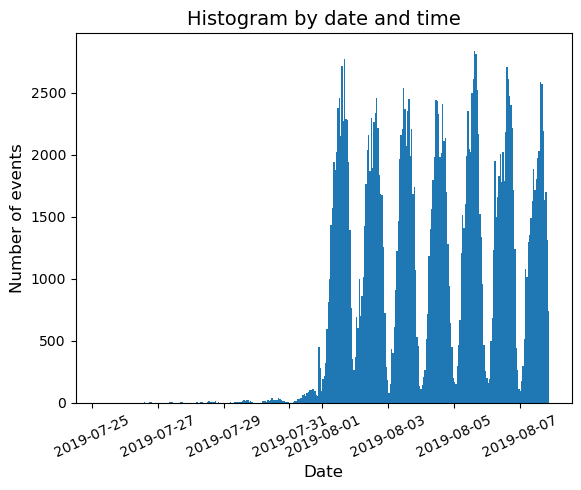

In [68]:
# Let's build a histogram by date and time.
plt.hist(df['event_timestamp'], bins=14*24)
plt.title('Histogram by date and time', fontsize=14)
plt.ylabel('Number of events', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=25)
plt.show()

In [69]:
# It seems that the data for June is incomplete. It is advisable to get rid of them.
df.groupby('date')['device_id'].count()

date
2019-07-25        9
2019-07-26       31
2019-07-27       55
2019-07-28      105
2019-07-29      184
2019-07-30      412
2019-07-31     2030
2019-08-01    36141
2019-08-02    35554
2019-08-03    33282
2019-08-04    32968
2019-08-05    36058
2019-08-06    35788
2019-08-07    31096
Name: device_id, dtype: int64

In [70]:
# Let's create a new dataset "df_c" in which we will save the data without July. "Reset" the index.
df_c = df[df['date']>'2019-07-31'].reset_index(drop= True)
df_c.head()

,event_name,device_id,event_timestamp,test_id,date
0,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
1,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
3,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
4,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01


Also, users who started their activity in July and whose data we deleted could continue their activity in August. It is advisable to identify such users and remove events for them from the entire dataframe.
Thus, we will only have data on new users who started their activity in August.

In [71]:
# Let's find out if we lost a lot of events and users by discarding the data
print('Total events in the log: there were', df['event_name'].count(),
      'became', df_c['event_name'].count(),
     '"losses"', round((df['event_name'].count() - df_c['event_name'].count()) / df['event_name'].count() * 100, 2),'%')
print('There were a total of users in the log:', df['device_id'].nunique(),
      'became', df_c['device_id'].nunique(),
     '"losses"', round((df['device_id'].nunique() - df_c['device_id'].nunique()) / df['device_id'].nunique() * 100, 2), '%')
print('The average number of events per user was:', round(df['event_name'].count() / df['device_id'].nunique()),
      'became', round(df_c['event_name'].count() / df_c['device_id'].nunique()))

Total events in the log: there were 243713 became 240887 "losses" 1.16 %
There were a total of users in the log: 7551 became 7534 "losses" 0.23 %
The average number of events per user was: 32 became 32


In [72]:
# Let's check that we have users from all three experimental groups
df_c.groupby('test_id')['device_id'].nunique()

test_id
246    2484
247    2513
248    2537
Name: device_id, dtype: int64

Each group has approximately the same number of unique users.

**Intermediate Conclusion:**

We have cleaned the dataframe by removing data from July, as well as users who started their activity in July.

As a result, we obtained a dataframe with data for 7 days in August and users who started their activity in this month.

After cleaning the data, the number of events in the log decreased by 25%, and the number of unique users decreased by 19%.

Each experimental group ended up with approximately the same number of unique users.

## 4. Sales funnel analysis.

In [73]:
# Let's see what events are in the logs, how often they occur
df_c.groupby('event_name').agg({'device_id': 'count'}).reset_index().sort_values(by='device_id', ascending=False)

,event_name,device_id
1,MainScreenAppear,117328
2,OffersScreenAppear,46333
0,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


Most of the events in the log are viewing the Main page. Significantly fewer events (more than twice) - viewing the Order page. Shopping Cart viewing is slightly less eventful than Order viewing. Even fewer events are the appearance of a payment message.

The least of all events is watching the Tutorial. Only about 1% of the Main Page view events.

In [74]:
# Let's count how many users performed each of these events.
# Sort the events by the number of users.
# Calculate the proportion of users who performed each event at least once.
a = df_c.groupby('event_name').agg({'device_id': 'nunique'}).reset_index().sort_values(by='device_id', ascending=False)
a.columns = ['event_name', 'number_users']
a['share_users'] = round(a['number_users'] / df['device_id'].count() * 100, 2)
a

,event_name,number_users,share_users
1,MainScreenAppear,7419,3.04
2,OffersScreenAppear,4593,1.88
0,CartScreenAppear,3734,1.53
3,PaymentScreenSuccessful,3539,1.45
4,Tutorial,840,0.34


The number of users who performed at least one event decreases similarly to the number of events in the log.

37% of users viewed the main page at least once, and 17% of users completed a payment.

Only 5% of users visited the Tutorial page.

**The following sequence of events emerges:**
- First, users view the Main Page _MainScreenAppear_.
- Next, they view the Order page _OffersScreenAppear_.
- Then, they proceed to the Cart page _CartScreenAppear_.
- Finally, after a successful payment, they see the Payment Confirmation page: _PaymentScreenSuccessful_.

When calculating the funnel, the views of the Tutorial page _Tutorial_ can be excluded.

The number of such events and users who performed them is minimal and does not correlate with the other user actions listed above.

In [75]:
# Let's calculate what proportion of users goes to the next step of the funnel (from the number of users in the previous one)
funnel = a.assign(roll_rate = lambda x: x['number_users'] / x['number_users'].shift() * 100).reset_index(drop=True)
funnel = funnel[funnel['event_name'] != 'Tutorial']
funnel['roll_rate'] = round(funnel['roll_rate'], 2)
funnel

,event_name,number_users,share_users,roll_rate
0,MainScreenAppear,7419,3.04,NaN
1,OffersScreenAppear,4593,1.88,61.91
2,CartScreenAppear,3734,1.53,81.30
3,PaymentScreenSuccessful,3539,1.45,94.78


In [76]:
print('From the first event to the payment it comes', round(funnel.iloc[3,1] / funnel.iloc[0,1] * 100, 2), '% users.')

From the first event to the payment it comes 47.7 % users.


In [77]:
# For further work, we will exclude the "Tutorial" event from the dataframe, save the data in "df_c"
df_c = df_c[df_c['event_name'] != 'Tutorial']

In [79]:
# Let's add a visualization of the funnel
from plotly import graph_objects as go
fig = go.Figure(go.Funnel(y = list(funnel['event_name']), x = list(funnel['roll_rate'].fillna(100))))
fig.update_layout(title={'text': 'Funnel Visualization', 'x':0.5, 'xanchor': 'center'})
fig.show()

**Intermediate Conclusion:**

We have identified the event funnel. One of the events, viewing the Tutorial, was excluded from the funnel.

The highest user drop-off occurs when transitioning from viewing the Main Page to the Order Page: 62% of users who viewed the Main Page proceed to the Order Page. In other words, 38% of users are "lost" at this step.

For comparison: about 19% of users are "lost" when transitioning from the Order Page to the Cart, and about 5% when moving from the Cart to Payment.

In total, 47% of users proceed from viewing the Main Page to making a Payment.

## 5. Experiment result analysis.

At this step, we will take into account the optimal level of statistical significance for the tests, given the fact that we have multiple hypothesis testing, which means that the risk of a false positive result increases, that is, the risk of finding differences where they actually do not exist.

In the future, we will designate the tests numbered "246", "247" and "248" as tests/groups as "A1", "A2" and "B".

In [80]:
# Let's save the number of unique users for each experimental group into separate variables
users_by_group = pd.DataFrame(df_c.groupby('test_id')['device_id'].nunique()).reset_index()
a1 = users_by_group.iloc[0,1]
a2 = users_by_group.iloc[1,1]
b = users_by_group.iloc[2,1]

In [81]:
# Let's create a table grouping the number of unique users by event and belonging to the test group.
# Rename the columns.
users_test = pd.pivot_table(df_c, index='event_name', columns='test_id', values='device_id', aggfunc='nunique').reset_index()
users_test.columns = ['event_name', 'A1', 'A2', 'B']
users_test = users_test.sort_values(by='A1', ascending=False)
users_test

,event_name,A1,A2,B
1,MainScreenAppear,2450,2476,2493
2,OffersScreenAppear,1542,1520,1531
0,CartScreenAppear,1266,1238,1230
3,PaymentScreenSuccessful,1200,1158,1181


### 5.1. A1/A2-experiment

Let's check whether the statistical criteria find the difference between the samples "A1" and "A2"

**Let's calculate the statistical significance of the difference in the share of users going to the Main page in these groups. Let's check the hypotheses.**

Hypotheses:

- H0: There is no statistically significant difference between the groups in the percentage of users going to the Main Page.
- H1 There is a statistically significant difference between the groups in the percentage of users going to the Main page.

In [82]:
# Let's calculate the share of transitions for A1 and A2
# Then we will calculate the total share of transitions for both groups
# And calculate the difference in the shares of transitions of the two groups
roll1_A1 = users_test.iloc[0,1] / a1
roll1_A2 = users_test.iloc[0,2] / a2
common_roll = (users_test.iloc[0,1] + users_test.iloc[0,2]) / (a1 + a2)
difference = roll1_A1 - roll1_A2

Since we have multiple hypothesis testing on the same samples, the risk of getting a false positive result increases. Accordingly, **it is advisable to take this into account when determining the level of statistical significance**.

For the first round of checks, we will determine the level of 0.05. Later, we will experiment with changing the significance level and compare the results.

In [83]:
# Let's determine the level of statistical significance for the first round of checks
alpha = 0.05

In [84]:
# Calculate the z_value, check the hypotheses
z_value = difference / mth.sqrt(common_roll * (1 - common_roll) * (1/a1 + 1/a2))
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)

if p_value < alpha:
    print('We reject the null hypothesis: there is a statistically significant difference between the groups')
else:
    print('It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups')

p-value:  0.7526703436483038
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups


For further use, we will wrap the code above in a function, make the alpha parameter equal to 0.05 and write it in the function, we will not report it as a separate argument:

In [85]:
def check_h (part_1, mass_1, part_2, mass_2, alpha):
    alpha = alpha
    roll_1 = part_1 / mass_1
    roll_2 = part_2 / mass_2
    common_roll = (part_1 + part_2) / (mass_1 + mass_2)
    difference = roll_1 - roll_2
    z_value = difference / mth.sqrt(common_roll * (1 - common_roll) * (1/mass_1 + 1/mass_2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-value: ', p_value)
    if p_value < alpha:
        print('We reject the null hypothesis: there is a statistically significant difference between the groupsа')
    else:
        print('It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups')

**Let's calculate the statistical significance of the difference in the percentage of user traffic to the Order page. Let's check the hypotheses.**

Hypotheses:

- H0: There is no statistically significant difference between the groups in the percentage of user traffic to the Order page.
- H1 There is a statistically significant difference between the groups in the percentage of users going to the Order page.

In [86]:
check_h(users_test.iloc[1,1], a1, users_test.iloc[1,2], a2, 0.05)

p-value:  0.24786096925282264
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups


**Let's calculate the statistical significance of the difference in the share of traffic to the Shopping Cart. Let's check the hypotheses.**

Hypotheses:

- H0: There is no statistically significant difference between the groups in the proportion of traffic to the Basket.
- H1 There is a statistically significant difference between the groups in the proportion of the transition to the Basket.

In [87]:
check_h(users_test.iloc[2,1], a1, users_test.iloc[2,2], a2, 0.05)

p-value:  0.22867643757335676
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups


**Let's calculate the statistical significance of the difference in the percentage of clicks on the successful Payment screen. Let's check the hypotheses.**

Hypotheses:

- H0: There is no statistically significant difference between the groups in the percentage of clicks on the successful Payment screen.
- H1 There is a statistically significant difference between the groups in the percentage of clicks on the successful Payment screen.

In [88]:
check_h(users_test.iloc[3,1], a1, users_test.iloc[3,2], a2, 0.05)

p-value:  0.11446627829276612
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups


**Intermediate Conclusion:**

We examined the differences in user transition rates:
- to the Main Page;
- to the Order Page;
- to the Cart;
- to the successful Payment screen.

In none of the tests were we able to reject the null hypothesis that there is no statistically significant difference between the groups.

In other words, we have no reason to consider the proportions of transitions for the A1 and A2 test participants to be different. The A/A experiment confirmed the correctness of the group division.

### 5.2. A1/B-experiment

In [89]:
# To begin with, let's calculate and analyze user transitions to each of the pages in groups
rolles = users_test
rolles['roll_A1'] = round(users_test['A1'] / a1 * 100, 2)
rolles['roll_A2'] = round(users_test['A2'] / a2 * 100, 2)
rolles['roll_B'] = round(users_test['B'] / b * 100, 2)
rolles

,event_name,A1,A2,B,roll_A1,roll_A2,roll_B
1,MainScreenAppear,2450,2476,2493,98.67,98.57,98.34
2,OffersScreenAppear,1542,1520,1531,62.10,60.51,60.39
0,CartScreenAppear,1266,1238,1230,50.99,49.28,48.52
3,PaymentScreenSuccessful,1200,1158,1181,48.33,46.10,46.59


Transitions in group B are smaller compared to A1 and A2 in terms of going to the Main page, to the Order page and to the Shopping Cart.

In terms of transitions to the Payment screen, B is better than group A2, but worse than A1.

Let's test hypotheses about the statistical significance of the difference in fractions.

Hypotheses:

- H0: There is no statistically significant difference in the transition rate between the groups.
- H1 There is a statistically significant difference in the transition fraction between the groups.

**Let's calculate:**
1. The statistical significance of the difference in the proportion of users going to the Main page. Let's check the hypotheses.
2. The statistical significance of the difference in the proportion of user traffic to the Order page. Let's check the hypotheses.
3. The statistical significance of the difference in the share of the transition to the Basket. Let's check the hypotheses.
4. The statistical significance of the difference in the percentage of clicks on the successful Payment screen. Let's check the hypotheses.

In [90]:
# Let's do it through a loop
for i in range(0,4):
    print('\033[30m\033[1m\033[4m Moving to {} \033[0m'.format(users_test.iloc[i,0]))
    check_h(users_test.iloc[i,1], a1, users_test.iloc[i,3], b, 0.05)
    print( )

 Moving to MainScreenAppear 
p-value:  0.3387114076159288
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to OffersScreenAppear 
p-value:  0.21442476639710506
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to CartScreenAppear 
p-value:  0.08067367598823139
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to PaymentScreenSuccessful 
p-value:  0.21693033984516674
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups



**Intermediate Conclusion:**

Despite the fact that the table visually shows that group B shows lower transitions than A1 on all screens, it was not possible to establish a statistically significant difference between these groups.

### 5.3. A2/B-experiment

Hypotheses:

- H0: There is no statistically significant difference in the transition rate between the groups.
- H1 There is a statistically significant difference in the transition fraction between the groups.

**Let's calculate:**
1. The statistical significance of the difference in the proportion of users going to the Main page. Let's check the hypotheses.
2. The statistical significance of the difference in the proportion of user traffic to the Order page. Let's check the hypotheses.
3. The statistical significance of the difference in the share of the transition to the Basket. Let's check the hypotheses.
4. The statistical significance of the difference in the percentage of clicks on the successful Payment screen. Let's check the hypotheses.

In [91]:
for i in range(0,4):
    print('\033[30m\033[1m\033[4m Moving to {} \033[0m'.format(users_test.iloc[i,0]))
    check_h(users_test.iloc[i,2], a2, users_test.iloc[i,3], b, 0.05)
    print( )

 Moving to MainScreenAppear 
p-value:  0.5194964354051703
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to OffersScreenAppear 
p-value:  0.9333751305879443
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to CartScreenAppear 
p-value:  0.5878284605111943
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to PaymentScreenSuccessful 
p-value:  0.7275718682261119
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups



**Intermediate Conclusion:**

It was not possible to establish a statistically significant difference in the proportion of user transitions to screens between groups B and A2.

### 5.4. A1+A2/B-experiment

Hypotheses:

- H0: There is no statistically significant difference in the transition rate between the groups.
- H1 There is a statistically significant difference in the transition fraction between the groups.

**Let's calculate:**
1. The statistical significance of the difference in the proportion of users going to the Main page. Let's check the hypotheses.
2. The statistical significance of the difference in the proportion of user traffic to the Order page. Let's check the hypotheses.
3. The statistical significance of the difference in the share of the transition to the Basket. Let's check the hypotheses.
4. The statistical significance of the difference in the percentage of clicks on the successful Payment screen. Let's check the hypotheses.

In [92]:
for i in range(0,4):
    print('\033[30m\033[1m\033[4m Moving to {} \033[0m'.format(users_test.iloc[i,0]))
    check_h((users_test.iloc[i,1] + users_test.iloc[i,2]), (a1 + a2), users_test.iloc[i,3], b, 0.05)
    print( )

 Moving to MainScreenAppear 
p-value:  0.3486684291093256
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to OffersScreenAppear 
p-value:  0.44582745409482394
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to CartScreenAppear 
p-value:  0.18683558686831558
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to PaymentScreenSuccessful 
p-value:  0.6107918742187335
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups



**Intermediate Conclusion:**

It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups.

## 6. Statistical significance level.

### 6.1. Increasing the level of statistical significance to 0.1

Let's try to increase the level of statistical significance to 0.1 and test the same hypotheses that we stated above

#### А1/А2-experiment

In [93]:
# Let's give the value alpha 0.1 to the argument of the function in the loop
for i in range(0,4):
    print('\033[30m\033[1m\033[4m Moving to {} \033[0m'.format(users_test.iloc[i,0]))
    check_h(users_test.iloc[i,1], a1, users_test.iloc[i,2], a2, 0.1)
    print( )

 Moving to MainScreenAppear 
p-value:  0.7526703436483038
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to OffersScreenAppear 
p-value:  0.24786096925282264
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to CartScreenAppear 
p-value:  0.22867643757335676
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to PaymentScreenSuccessful 
p-value:  0.11446627829276612
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups



#### А1/B-experiment

In [94]:
for i in range(0,4):
    print('\033[30m\033[1m\033[4m Moving to {} \033[0m'.format(users_test.iloc[i,0]))
    check_h(users_test.iloc[i,1], a1, users_test.iloc[i,3], b, 0.1)
    print( )

 Moving to MainScreenAppear 
p-value:  0.3387114076159288
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to OffersScreenAppear 
p-value:  0.21442476639710506
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to CartScreenAppear 
p-value:  0.08067367598823139
We reject the null hypothesis: there is a statistically significant difference between the groupsа

 Moving to PaymentScreenSuccessful 
p-value:  0.21693033984516674
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups



#### А2/В-experiment

In [95]:
for i in range(0,4):
    print('\033[30m\033[1m\033[4m Moving to {} \033[0m'.format(users_test.iloc[i,0]))
    check_h(users_test.iloc[i,2], a2, users_test.iloc[i,3], b, 0.1)
    print( )

 Moving to MainScreenAppear 
p-value:  0.5194964354051703
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to OffersScreenAppear 
p-value:  0.9333751305879443
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to CartScreenAppear 
p-value:  0.5878284605111943
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to PaymentScreenSuccessful 
p-value:  0.7275718682261119
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups



#### А1+А2/В-experiment

In [96]:
for i in range(0,4):
    print('\033[30m\033[1m\033[4m Moving to {} \033[0m'.format(users_test.iloc[i,0]))
    check_h((users_test.iloc[i,1] + users_test.iloc[i,2]), (a1 + a2), users_test.iloc[i,3], b, 0.1)
    print( )

 Moving to MainScreenAppear 
p-value:  0.3486684291093256
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to OffersScreenAppear 
p-value:  0.44582745409482394
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to CartScreenAppear 
p-value:  0.18683558686831558
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to PaymentScreenSuccessful 
p-value:  0.6107918742187335
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups



**Conclusion:**

By increasing the level of statistical significance, we were able to reject the null hypothesis of equality between groups A1 and B in terms of transitions to the Cart. Group B shows a lower transition rate, and this difference is statistically significant.

### 6.2. Decrease in the level of statistical significance. Bonferroni correction.

Let's try to reduce the level of statistical significance and test the hypotheses that we stated above.

Given that we are conducting multiple hypothesis testing on the same samples, we thereby increase the risk of getting a false positive result. Accordingly, it is advisable to take this into account when determining the level of statistical significance.

To reduce the probability of a false positive result in multiple hypothesis testing, we will adjust the level of statistical significance. Let's apply the Bonferroni correction: divide the significance level we applied at the beginning by default (0.05) by the number of hypotheses being tested.

In each test, we compare 4 screens, i.e. we check 4 null hypotheses.

In [97]:
# Divide 0.05 by 4 and determine the alpha level, taking into account the correction for multiple verification
bon_al = 0.05 / 4

We will perform a check taking into account the adjusted value of statistical significance.

#### А1/А2-experiment

In [98]:
for i in range(0,4):
    print('\033[30m\033[1m\033[4m Moving to {} \033[0m'.format(users_test.iloc[i,0]))
    check_h(users_test.iloc[i,1], a1, users_test.iloc[i,2], a2, bon_al)
    print( )

 Moving to MainScreenAppear 
p-value:  0.7526703436483038
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to OffersScreenAppear 
p-value:  0.24786096925282264
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to CartScreenAppear 
p-value:  0.22867643757335676
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to PaymentScreenSuccessful 
p-value:  0.11446627829276612
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups



#### А1/B-experiment

In [99]:
for i in range(0,4):
    print('\033[30m\033[1m\033[4m Moving to {} \033[0m'.format(users_test.iloc[i,0]))
    check_h(users_test.iloc[i,1], a1, users_test.iloc[i,3], b, bon_al)
    print( )

 Moving to MainScreenAppear 
p-value:  0.3387114076159288
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to OffersScreenAppear 
p-value:  0.21442476639710506
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to CartScreenAppear 
p-value:  0.08067367598823139
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to PaymentScreenSuccessful 
p-value:  0.21693033984516674
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups



#### А2/В-experiment

In [100]:
for i in range(0,4):
    print('\033[30m\033[1m\033[4m Moving to {} \033[0m'.format(users_test.iloc[i,0]))
    check_h(users_test.iloc[i,2], a2, users_test.iloc[i,3], b, bon_al)
    print( )

 Moving to MainScreenAppear 
p-value:  0.5194964354051703
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to OffersScreenAppear 
p-value:  0.9333751305879443
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to CartScreenAppear 
p-value:  0.5878284605111943
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to PaymentScreenSuccessful 
p-value:  0.7275718682261119
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups



#### А1+А2/В-experiment

In [101]:
for i in range(0,4):
    print('\033[30m\033[1m\033[4m Moving to {} \033[0m'.format(users_test.iloc[i,0]))
    check_h((users_test.iloc[i,1] + users_test.iloc[i,2]), (a1 + a2), users_test.iloc[i,3], b, bon_al)
    print( )

 Moving to MainScreenAppear 
p-value:  0.3486684291093256
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to OffersScreenAppear 
p-value:  0.44582745409482394
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to CartScreenAppear 
p-value:  0.18683558686831558
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups

 Moving to PaymentScreenSuccessful 
p-value:  0.6107918742187335
It was not possible to reject the null hypothesis: there is no statistically significant difference between the groups



**Conclusion:**

As in the previous case, when setting the significance level at 0.05, we were unable to reject the null hypothesis, indicating no statistically significant difference between the groups. However, by applying the Bonferroni correction, we reduced the likelihood of false positives in multiple hypothesis testing.

## 7. Conclusions.

**Data and Funnel.**
1. An analysis of user actions during 7 days of August was conducted. The data was initially cleaned of users who started their activity in July.
2. A user action funnel was identified, consisting of transitions to the following pages/screens:
- Main Page _MainScreenAppear_,
- Order Page _OffersScreenAppear_,
- Cart Page _CartScreenAppear_,
- Payment Confirmation Screen _PaymentScreenSuccessful_.
3. The highest user drop-off occurs when transitioning from the Main Page to the Order Page: 62% of users who viewed the Main Page proceed to the Order Page. In other words, 38% of users are "lost" at this step.

**Recommendations:**
- It makes sense to involve specialists to work on encouraging users to transition to the Order screen: feature recommended products, promotions, thematic items based on the user profile (if possible), product sets with recipes, etc., on the main page.

**A/A/B Test.**
- A verification of group splitting was performed on the data from the two control groups A1 and A2. In none of the tests were we able to reject the null hypothesis that there is no statistically significant difference between the groups. The A/A experiment confirmed the correctness of the group splitting.
- A table was created showing user transition rates across screens for groups A1, A2, and B. Group B shows lower transition volumes compared to both A1 and A2 across all screens, except for the transition to the Payment screen compared to group A2.
- We conducted an A1/B test. No statistically significant difference in transition rates between these groups was found.
- We conducted an A2/B test. No statistically significant difference in transition rates between these groups was found.
- We conducted an A1+A2/B test. No statistically significant difference in transition rates between these groups was found.
- The Bonferroni correction was applied to reduce the likelihood of false positives in multiple testing.

**Recommendations:**
- Although group B shows lower user transitions to all screens except for the transition to the Payment screen compared to group A2, no statistically significant difference with the control groups was found. _Preliminarily, we can conclude that the new font does not have an advantage over the old one in terms of increasing the proportion of users who perform certain actions (transition to a page/screen)_.
- _However, it is recommended to extend the test duration from 2 weeks to 1 month_. A 7-day period seems too short to draw a final conclusion.